In [28]:
#import necessary libaries
import pandas as pd
pd.set_option('display.max_columns', None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split, learning_curve


import warnings
warnings.filterwarnings('ignore')

In [29]:
#opening the Classification file
df = pd.read_csv("classification_data.csv")

In [30]:
#view sample of our data
df.sample(10)

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
458,258119,1,2,24,3,2,2333,5,2,4,3,1,2,2,29,1,2,1,2,1,1,1
92,483560,1,2,30,0,9,4221,1,3,2,2,1,1,3,28,3,2,2,3,1,1,1
858,632538,0,1,42,2,3,3965,1,2,4,3,1,3,3,34,3,2,1,3,1,1,1
35,82178,1,1,6,4,0,860,1,5,1,2,1,4,4,39,3,2,2,3,1,2,1
196,414758,1,4,6,4,0,6761,1,4,1,3,1,3,4,45,3,2,2,4,2,2,1
164,349090,1,3,15,2,6,392,1,2,4,2,1,4,2,23,3,1,1,3,1,2,1
690,735552,1,4,60,2,3,10144,2,4,2,2,1,4,1,21,3,2,1,3,1,2,1
790,376001,0,2,15,0,0,1778,1,2,2,2,1,1,1,26,3,1,2,1,1,1,1
826,324671,0,2,48,0,9,3844,2,4,4,3,1,4,4,34,3,3,1,2,2,1,1
708,259384,0,1,48,1,9,7685,1,4,2,2,3,4,3,37,3,1,1,3,1,1,1


In [31]:
# data statistic
df.describe()

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,396518.897000,0.700000,2.577000,20.903000,2.54500,2.828000,3271.24800,2.105000,3.384000,2.973000,2.68200,1.145000,2.845000,2.358000,35.54200,2.675000,1.928000,1.407000,2.904000,1.155000,1.404000,1.037000
std,225382.045777,0.458487,1.257638,12.058814,1.08312,2.744439,2822.75176,1.580023,1.208306,1.118715,0.70808,0.477706,1.103718,1.050209,11.35267,0.705601,0.530186,0.577654,0.653614,0.362086,0.490943,0.188856
min,505.000000,0.000000,1.000000,4.000000,0.00000,0.000000,250.00000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,19.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,201780.000000,0.000000,1.000000,12.000000,2.00000,1.000000,1365.50000,1.000000,3.000000,2.000000,2.00000,1.000000,2.000000,1.000000,27.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
50%,395127.500000,1.000000,2.000000,18.000000,2.00000,2.000000,2319.50000,1.000000,3.000000,3.000000,3.00000,1.000000,3.000000,2.000000,33.00000,3.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,586323.000000,1.000000,4.000000,24.000000,4.00000,3.000000,3972.25000,3.000000,5.000000,4.000000,3.00000,1.000000,4.000000,3.000000,42.00000,3.000000,2.000000,2.000000,3.000000,1.000000,2.000000,1.000000
max,797738.000000,1.000000,4.000000,72.000000,4.00000,10.000000,18424.00000,5.000000,5.000000,4.000000,4.00000,3.000000,4.000000,4.000000,75.00000,3.000000,3.000000,4.000000,4.000000,2.000000,2.000000,2.000000


Note:
Outliers: Credit Amount,Duration of Credit (month) and Age exhibit potential outliers. We'll address them in the next section.

In [32]:
df.info() # Checking for data types and missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   user_id                            1000 non-null   int64
 1   label                              1000 non-null   int64
 2   Account type                       1000 non-null   int64
 3   Duration of Credit (month)         1000 non-null   int64
 4   Payment Status of Previous Credit  1000 non-null   int64
 5   Purpose                            1000 non-null   int64
 6   Credit Amount                      1000 non-null   int64
 7   Savings type                       1000 non-null   int64
 8   Length of current employment       1000 non-null   int64
 9   Instalment per cent                1000 non-null   int64
 10  Marital Status                     1000 non-null   int64
 11  Guarantors                         1000 non-null   int64
 12  Duration in Current a

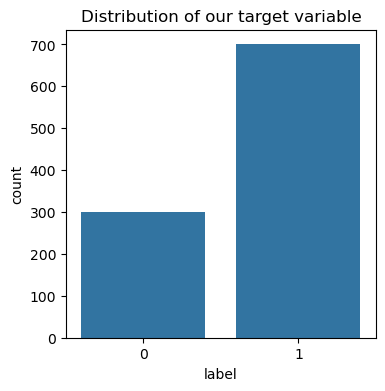

In [33]:
# plotting the the label column to check for the distribution of target
plt.figure(figsize=[4,4])
sns.countplot(x="label", data=df)
plt.title("Distribution of our target variable")
plt.show();

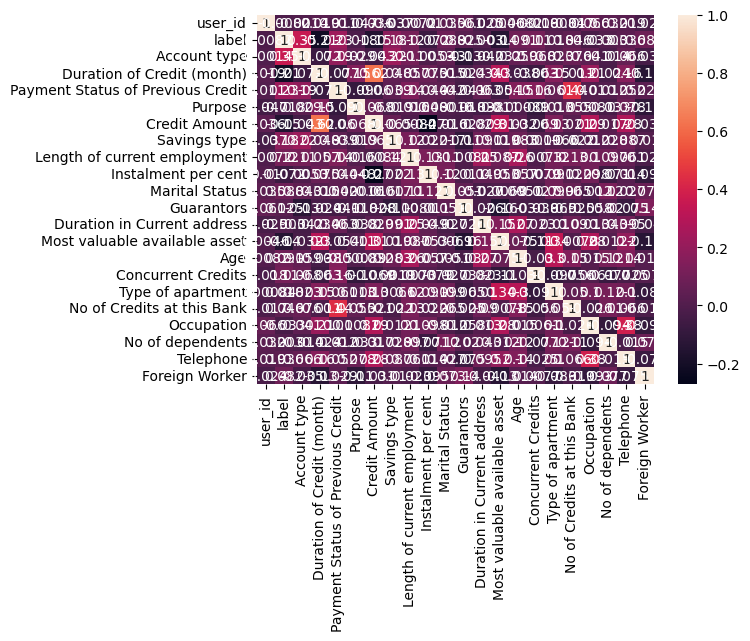

In [34]:
#plotting the heatmap to see if there are any multicollinearity
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

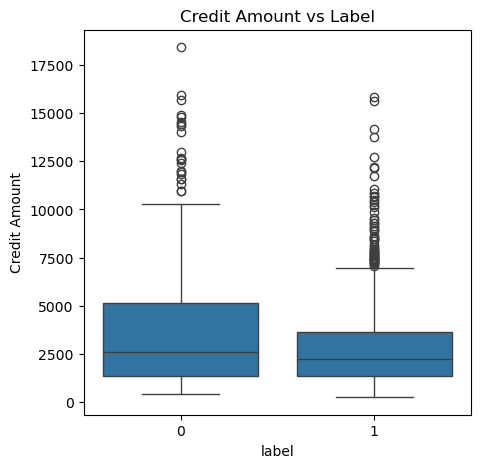

In [35]:
# Distribution of Credit Amount grouped by Label to see if credit amount is a  meaningful feature for predicting creditworthiness
plt.figure(figsize=[5,5])
sns.boxplot(x='label', y='Credit Amount', data=df)
plt.title('Credit Amount vs Label')
plt.show()

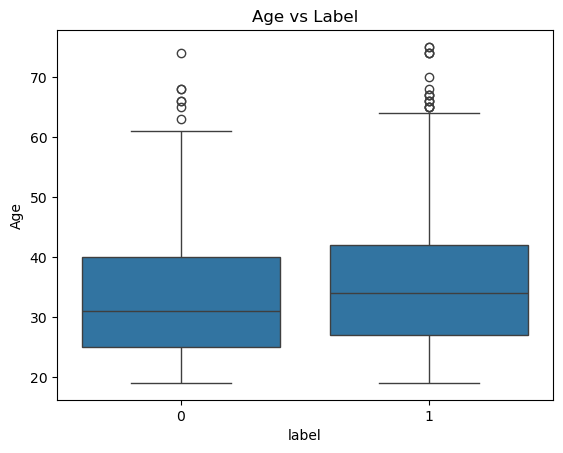

In [36]:
# Age distribution grouped by Label
sns.boxplot(x='label', y='Age', data=df)
plt.title('Age vs Label')
plt.show()

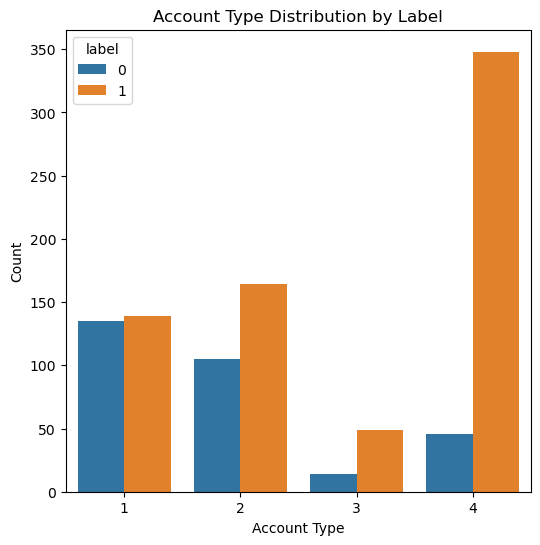

In [37]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Account type', hue='label')

# Add titles and labels
plt.title('Account Type Distribution by Label')
plt.xlabel('Account Type')
plt.ylabel('Count')

# Show the plot
plt.show()

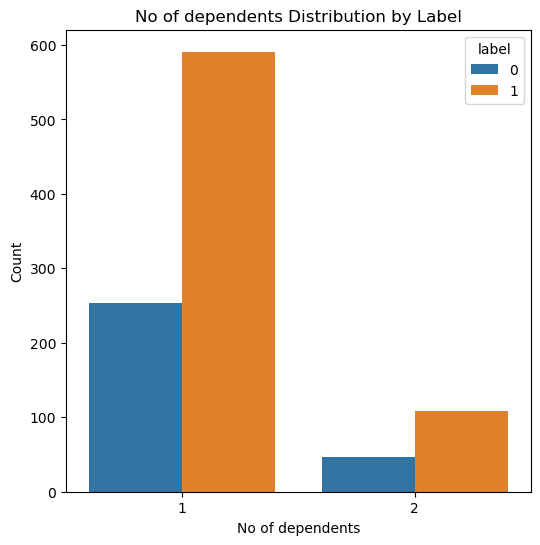

In [38]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='No of dependents', hue='label')

# Add titles and labels
plt.title('No of dependents Distribution by Label')
plt.xlabel('No of dependents')
plt.ylabel('Count')

# Show the plot
plt.show()

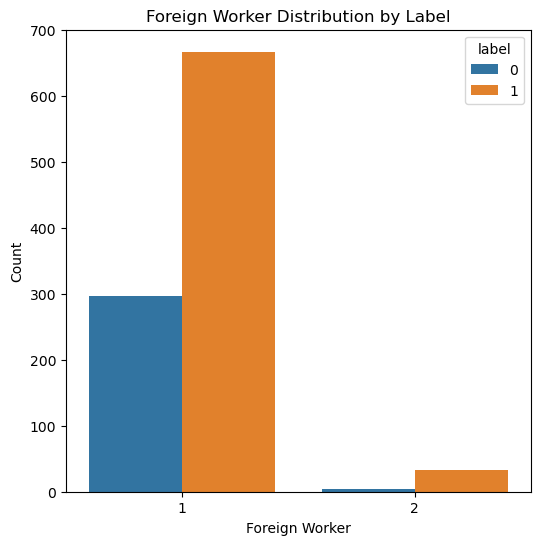

In [39]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Foreign Worker', hue='label')

# Add titles and labels
plt.title('Foreign Worker Distribution by Label')
plt.xlabel('Foreign Worker')
plt.ylabel('Count')

# Show the plot
plt.show()

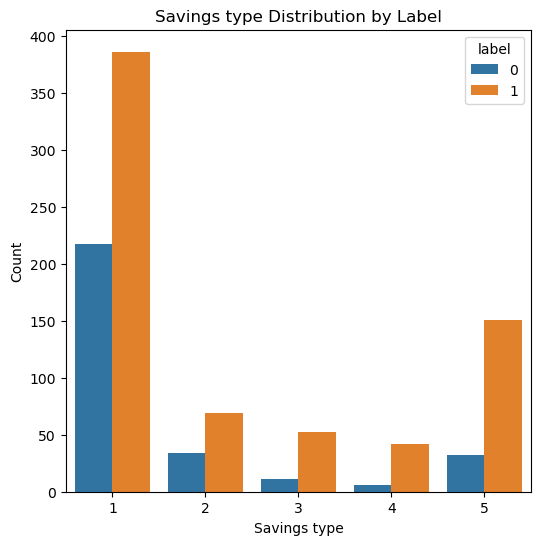

In [40]:
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x='Savings type', hue='label')

# Add titles and labels
plt.title('Savings type Distribution by Label')
plt.xlabel('Savings type')
plt.ylabel('Count')

# Show the plot
plt.show()

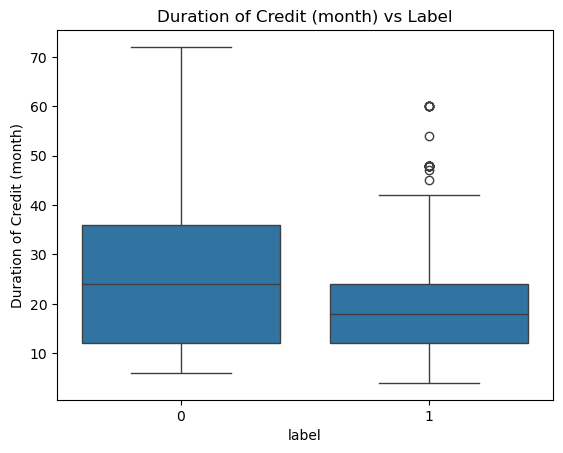

In [41]:
# Duration of Credit vs Label
sns.boxplot(x='label', y='Duration of Credit (month)', data=df)
plt.title('Duration of Credit (month) vs Label')
plt.show()

In [42]:
#the Debt-to-Income ratio helps in evaluating the ability of individuals to manage their debt based on their income
df['Debt-to-Income'] = df['Credit Amount'] / df['Instalment per cent']

In [43]:
# creating a function that handles outliers we highlighted earlier
def remove_outliers(df, x):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    non_outlier= Q3-Q1
    lower_bound = Q1 - 1.5*non_outlier
    upper_bound = Q3 - 1.5*non_outlier
    return df[(df[x] >= lower_bound) & (df[x] <= upper_bound)]    

In [44]:
clean_df = remove_outliers(df, "Credit Amount")
clean_df = remove_outliers(df, 'Age')
clean_df = remove_outliers(df, "Duration of Credit (month)")
clean_df.shape # checking the data 

(82, 23)

In [45]:
#base on the types of data given we need to encode the categorical for the model not to mistake it for continous
# While we need to standardize the continous feature to be in uniform values
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_cols = [  'Account type','Payment Status of Previous Credit',
                       'Purpose','Savings type','Marital Status','Guarantors',
                       'Type of apartment', 'Occupation','Foreign Worker']
for col in categorical_cols:
    clean_df[col] = label_encoder.fit_transform(clean_df[col])

# Scale continuous features
scaler = StandardScaler()
continuous_cols = ['Duration of Credit (month)','Instalment per cent',
                    'Credit Amount', 'Age','Length of current employment',
                   'Duration in Current address','Concurrent Credits','No of Credits at this Bank','Debt-to-Income']
clean_df[continuous_cols] = scaler.fit_transform(clean_df[continuous_cols])

In [46]:
clean_df

,user_id,label,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Debt-to-Income
7,103992,1,0,0.299743,4,0,-0.188760,0,-0.968311,-0.162055,2,0,1.131766,1,0.144423,0.439953,1,-0.668477,1,2,1,1,-0.295356
12,697417,1,0,0.299743,4,3,0.068163,0,0.635760,-0.992586,1,0,1.131766,3,-0.556790,0.439953,1,-0.668477,2,1,1,0,0.232044
15,722815,1,0,0.299743,2,3,0.365607,2,-0.166276,-0.162055,2,0,0.256249,1,0.456074,0.439953,0,-0.668477,2,2,1,0,-0.029693
20,710942,1,0,0.299743,4,0,0.809187,0,-0.166276,-0.992586,2,0,0.256249,1,-0.089314,0.439953,0,2.653649,2,2,1,0,0.942267
24,191079,1,0,0.299743,4,0,1.257509,4,-0.968311,-0.992586,2,0,0.256249,1,0.456074,0.439953,1,0.992586,1,2,1,0,1.371955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,204657,0,0,0.299743,1,6,-0.259026,0,1.437795,1.499008,1,0,1.131766,4,-0.245140,0.439953,2,-0.668477,2,1,1,0,-0.452770
825,597498,0,1,0.299743,3,0,-0.254284,0,-1.770346,1.499008,2,0,1.131766,2,0.689811,0.439953,1,-0.668477,3,1,2,0,-0.451634
834,326993,0,3,0.299743,2,2,1.212246,0,-0.968311,-0.992586,1,0,1.131766,2,-0.478877,0.439953,1,-0.668477,2,1,1,0,1.328573
974,86381,0,0,0.299743,2,6,-0.582335,0,-0.968311,1.499008,1,0,1.131766,2,-1.180090,0.439953,1,-0.668477,2,1,1,0,-0.530238


In [47]:
#split the data into features and target variables and also drop columns that are not relevant to our model
X = clean_df.drop(columns=["label","user_id"])
y=clean_df["label"]
X

,Account type,Duration of Credit (month),Payment Status of Previous Credit,Purpose,Credit Amount,Savings type,Length of current employment,Instalment per cent,Marital Status,Guarantors,Duration in Current address,Most valuable available asset,Age,Concurrent Credits,Type of apartment,No of Credits at this Bank,Occupation,No of dependents,Telephone,Foreign Worker,Debt-to-Income
7,0,0.299743,4,0,-0.188760,0,-0.968311,-0.162055,2,0,1.131766,1,0.144423,0.439953,1,-0.668477,1,2,1,1,-0.295356
12,0,0.299743,4,3,0.068163,0,0.635760,-0.992586,1,0,1.131766,3,-0.556790,0.439953,1,-0.668477,2,1,1,0,0.232044
15,0,0.299743,2,3,0.365607,2,-0.166276,-0.162055,2,0,0.256249,1,0.456074,0.439953,0,-0.668477,2,2,1,0,-0.029693
20,0,0.299743,4,0,0.809187,0,-0.166276,-0.992586,2,0,0.256249,1,-0.089314,0.439953,0,2.653649,2,2,1,0,0.942267
24,0,0.299743,4,0,1.257509,4,-0.968311,-0.992586,2,0,0.256249,1,0.456074,0.439953,1,0.992586,1,2,1,0,1.371955
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
809,0,0.299743,1,6,-0.259026,0,1.437795,1.499008,1,0,1.131766,4,-0.245140,0.439953,2,-0.668477,2,1,1,0,-0.452770
825,1,0.299743,3,0,-0.254284,0,-1.770346,1.499008,2,0,1.131766,2,0.689811,0.439953,1,-0.668477,3,1,2,0,-0.451634
834,3,0.299743,2,2,1.212246,0,-0.968311,-0.992586,1,0,1.131766,2,-0.478877,0.439953,1,-0.668477,2,1,1,0,1.328573
974,0,0.299743,2,6,-0.582335,0,-0.968311,1.499008,1,0,1.131766,2,-1.180090,0.439953,1,-0.668477,2,1,1,0,-0.530238


In [48]:
#spliting the into 80% training data and 20% test data 
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=42)

We are going to use two models XGBOOST and Rnadomforest for our dataset using Gridsearch for the hyperparameter tuning

In [49]:
#import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

Using Random Forest

In [50]:
#instantieRandom forest model

rf = RandomForestClassifier()

In [51]:
#these are parameters in the parameter grid for the rf hyperparameter tuning
n_estimators=[int(x) for x in np.linspace(start=10, stop=80, num=10)]
max_features=["log2", "sqrt"]
max_depth = [2,4]
min_samples_split=[2,5]
min_samples_leaf=[1,2]
bootstrap=[True, False]

In [52]:
# A parameter grid for Random forest
param_grid = {
    'n_estimators':n_estimators,
    'max_features':max_features,
    'max_depth':max_depth,
    'min_samples_split':min_samples_split,
    'min_samples_leaf':min_samples_leaf,
    'bootstrap':bootstrap}
    
print(param_grid)

{'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72, 80], 'max_features': ['log2', 'sqrt'], 'max_depth': [2, 4], 'min_samples_split': [2, 5], 'min_samples_leaf': [1, 2], 'bootstrap': [True, False]}


In [53]:
rf_grid=GridSearchCV(estimator = rf, param_grid = param_grid, cv=4, verbose=2, n_jobs=4,  scoring='accuracy')
rf_grid.fit(X_train,y_train)

Fitting 4 folds for each of 320 candidates, totalling 1280 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'bootstrap': [True, False], 'max_depth': [2, 4],
                         'max_features': ['log2', 'sqrt'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 5],
                         'n_estimators': [10, 17, 25, 33, 41, 48, 56, 64, 72,
                                          80]},
             scoring='accuracy', verbose=2)

In [54]:
# Best parameters and score for random forest 
best_params = rf_grid.best_params_
best_score = rf_grid.best_score_

print("Best Parameters:", best_params)
print("Best Cross-Validation Score:", best_score)

Best Parameters: {'bootstrap': True, 'max_depth': 4, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 10}
Best Cross-Validation Score: 0.9080882352941176


Using the Xgboost 

In [55]:
#instantiate XGBOOST
xgb = XGBClassifier()


In [56]:
# A parameter grid for XGBoost 
params = {
        'min_child_weight': [1, 3, 5],
        'gamma': [0.5, 1, 2, 5],
        'subsample': [0.7, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 5, 7]
        }

In [57]:
xgb_grid = GridSearchCV(xgb, params, cv=3, scoring = 'accuracy')
xgb_grid.fit(X_train,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.6, 0.8, 1.0],
                         'gamma': [0.5, 1, 2, 5], 'max_depth': [3, 5, 7],
                         'min_child_weight': [1, 3, 5],
                         'subsample': [0.7, 0.8, 1.0]},
             scoring='accuracy')

In [58]:
# Best parameters and score
bests_params = xgb_grid.best_params_
bests_score = xgb_grid.best_score_

print("Best Parameters:", bests_params)
print("Best Cross-Validation Score:", bests_score)

Best Parameters: {'colsample_bytree': 0.6, 'gamma': 0.5, 'max_depth': 3, 'min_child_weight': 1, 'subsample': 0.7}
Best Cross-Validation Score: 0.8924963924963926


Evaluating each model: Evaluate the models based on the test set using accuracy.

In [59]:
from sklearn.metrics import accuracy_score

In [60]:
#Evaluating Random Forest
rf_best_estimator = rf_grid.best_estimator_
y_predict_rf = rf_grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_predict_rf)}")
print(rf_best_estimator)

Accuracy: 0.9411764705882353
RandomForestClassifier(max_depth=4, min_samples_split=5, n_estimators=10)


In [61]:
#Evaluating XGBoost
xgb_best_estimator = xgb_grid.best_estimator_
y_pred_xgb = xgb_grid.best_estimator_.predict(X_test)
print(f"Accuracy: {accuracy_score(y_test, y_pred_xgb)}")
print(xgb_best_estimator)

Accuracy: 0.9411764705882353
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.5, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)


In [62]:
# Create a function to plot the learning curve
def plot_learning_curve(estimator, X, y, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Calculate mean and std for train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    # Fill between to show std deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color='r', alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color='g', alpha=0.1)

    # Add labels and title
    plt.title('Learning Curve for XGBoost')
    plt.xlabel('Training Examples')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Plot the learning curve for XGBoost
plot_learning_curve(xgb_best, X_train, y_train, scoring='accuracy')


NameError: name 'xgb_best' is not defined

The learning curve for XGBoost has a good balance: the score of training goes up and then gets stabilized at 90-95%, while the score of cross-validation is still quite close-in other words, low bias and moderate variance.

In [ ]:
# Create a function to plot the learning curve
def plot_learning_curve(estimator, X, y, scoring='accuracy'):
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=5, scoring=scoring, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10), random_state=42
    )

    # Calculate mean and std for train and test scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    plt.figure(figsize=(10, 6))
    plt.plot(train_sizes, train_scores_mean, label='Training score', color='r')
    plt.plot(train_sizes, test_scores_mean, label='Cross-validation score', color='g')

    # Fill between to show std deviation
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, color='r', alpha=0.1)
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, color='g', alpha=0.1)

    # Add labels and title
    plt.title('Learning Curve for Random Forest')
    plt.xlabel('Training Examples')
    plt.ylabel(scoring.capitalize())
    plt.legend(loc='best')
    plt.grid()
    plt.show()

# Assuming the best estimator (rf_best_estimator), X_train, and y_train are available
plot_learning_curve(rf_best_estimator, X_train, y_train, scoring='accuracy')


On the contrary, Random Forest starts off with almost perfect training accuracy, showing overfitting, while its cross-validation score has higher fluctuations, reflecting higher variance.